In [2]:
import os
import sys
from glob import glob

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


'/Users/maggie/Documents/Github/LogisticRegression_HPDmobile'

In [88]:
parent_dir = os.path.dirname(os.getcwd())


def get_coeffs(result_file):

    to_read = glob(os.path.join(parent_dir, 'Results', result_file, '*_coeffs.csv'))[0]
    coeffs = pd.read_csv(to_read, index_col=0)
    coeffs.index.name = 'Coefficient'
    coeffs.drop(['cv'], inplace=True)
    coeffs = coeffs.astype(float)

    coeffs['mean'] = coeffs.mean(axis=1)
    coeffs['stdev'] = coeffs.std(axis=1, ddof=1)
    coeffs['errors'] = coeffs['mean'] - 1.96*coeffs['stdev']/np.sqrt(6)

    lag_list = sorted([f'lag{i}_occupied' for i in range(1,9)])
    var_list = ['C', 'Intercept', 'audio', 'img', 'temp', 'rh', 'light', 'co2eq', 'weekend', 'hr_cos', 'hr_sin'] + lag_list
    coeffs['variables'] = pd.Categorical(coeffs.index, categories=var_list, ordered=True)
    coeffs.sort_values('variables', inplace=True)
    
    return coeffs



In [104]:
# def plot_coeffs(coef_df, fname=''):

#     sns.set_context('notebook')


#     fig, ax = plt.subplots(figsize=(15, 10))
    
#     # Error bars for 95% confidence interval
#     # Can increase capsize to add whiskers
#     coef_df.plot(x='variables', y='mean', kind='bar',
#                  ax=ax, color='none', fontsize=22, 
#                  ecolor='steelblue',capsize=8,
#                  yerr='errors', legend=False)
    
#     # Set title & labels
#     plt.title('Coefficients of Features w/ 95% Confidence Intervals',fontsize=30)
#     ax.set_ylabel('Coefficients',fontsize=22)
#     ax.set_xlabel('',fontsize=22)
    
#     # Coefficients
#     ax.scatter(x=np.arange(coef_df.shape[0]), 
#                marker='o', s=80, 
#                y=coef_df['mean'], color='steelblue')
    
#     # Line to define zero on the y-axis
#     ax.axhline(y=0, linestyle='--', color='red', linewidth=1)
    
#     save_loc = os.path.join(parent_dir, 'Results', 'Plots', f'{fname}_coeffs.pdf')
# #     plt.savefig(save_loc)
    
#     return plt

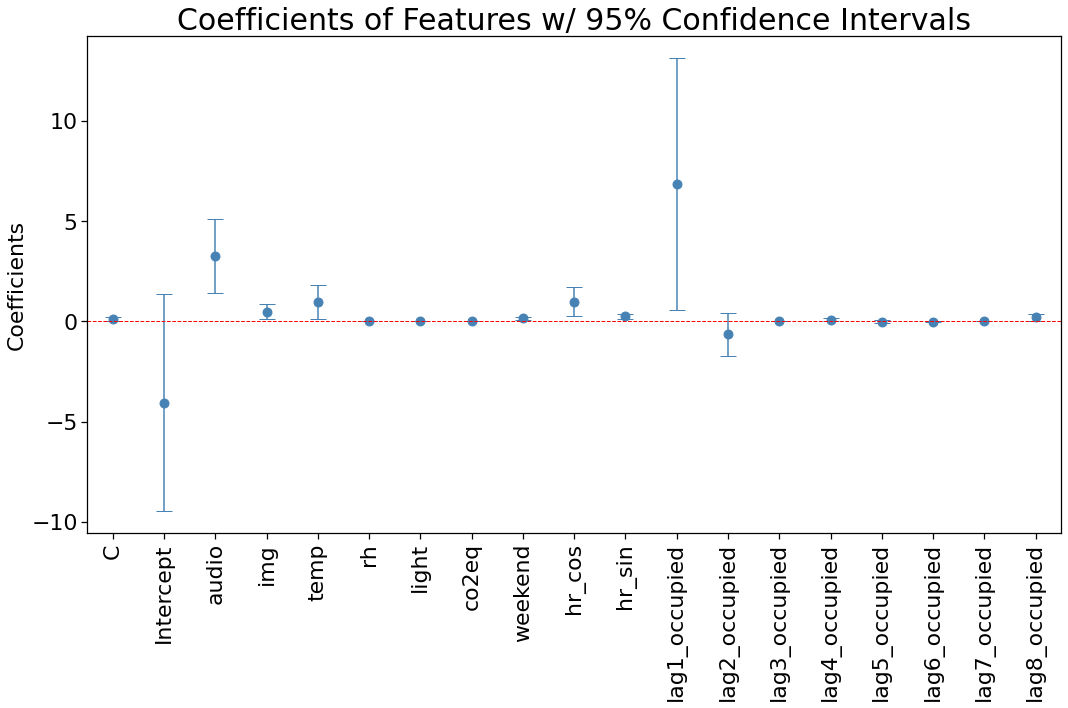

In [226]:
result_file = 'full_noCV_zeroFill'
coef_df = get_coeffs(result_file)

coef_plot = plot_coeffs(coef_df=coef_df, fname='no_CV')
coef_plot.show()

                   mean    errors      variables   mean_cv  errors_cv
Coefficient                                                          
C              0.100000  0.100000              C  2.151567   0.993462
Intercept           NaN       NaN      Intercept       NaN        NaN
audio               NaN       NaN          audio       NaN        NaN
img            0.488333 -0.385406            img  2.930353  -0.692121
temp           0.980000 -0.849619           temp  5.100947   0.092621
rh             0.000000  0.000000             rh  4.642274  -0.556047
light          0.000000  0.000000          light  5.137136   0.959989
co2eq          0.000000  0.000000          co2eq  3.369814  -1.587833
weekend        0.143333 -0.058496        weekend  0.684470   0.035009
hr_cos         0.988333  0.701185         hr_cos  1.534225   1.066204
hr_sin         0.245000 -0.133701         hr_sin  0.508421  -0.150031
lag1_occupied       NaN       NaN  lag1_occupied       NaN        NaN
lag2_occupied       

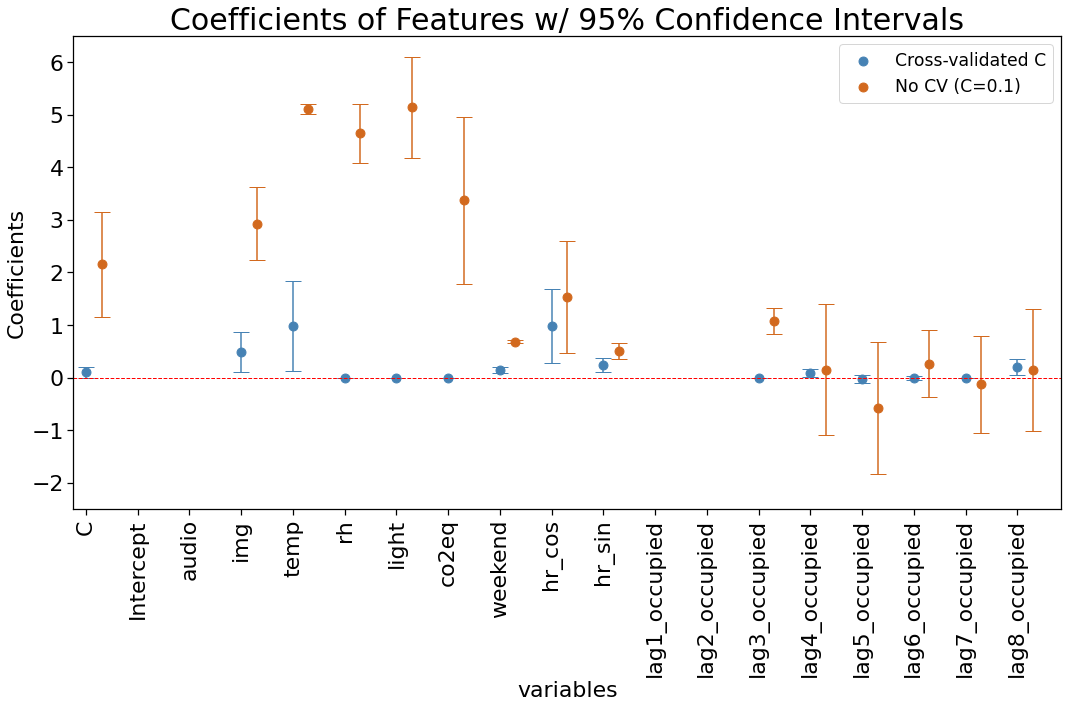

In [261]:


def plot_coeffs(coef_df, fname='', plot_2=False):

    coeff_vars = coef_df['variables']
#     coef_df.drop(['Intercept', 'audio', 'lag1_occupied', 'lag2_occupied'], inplace=True)
    large_cols = ['Intercept', 'audio', 'lag1_occupied', 'lag2_occupied']

    for c in large_cols:
        coef_df.loc[c,:] = np.nan
    coef_df['variables'] = coeff_vars
        
    print(coef_df)
#         coef_df[c].loc[coef_df[c].isnull().any(axis=1), :] = np.nan
    sns.set_context('notebook')


    fig, ax = plt.subplots(figsize=(15, 10))
    
    # Error bars for 95% confidence interval
    # Can increase capsize to add whiskers
    coef_df.plot(x='variables', y='mean', kind='bar',
                 ax=ax, color='none', fontsize=22, 
                 ecolor='steelblue',capsize=8,
                 yerr='errors', legend=False)
    
    
    # Set title & labels
    plt.title('Coefficients of Features w/ 95% Confidence Intervals',fontsize=30)
    ax.set_ylabel('Coefficients',fontsize=22)
    ax.set_xlabel('',fontsize=22)
    
    # Coefficients
    ax.scatter(x=np.arange(coef_df.shape[0]), 
               marker='o', s=80, 
               y=coef_df['mean'], color='steelblue', label='No CV')
    
    if plot_2:
    
        coef_df.plot(x='variables', y='mean_cv', kind='bar', width=0.6, align='edge',
                     ax=ax, color='none', fontsize=22,
                     ecolor='chocolate',capsize=8,
                     yerr='errors_cv', legend=False)

        ax.scatter(x=np.arange(coef_df.shape[0])+0.3, 
               marker='o', s=80,
               y=coef_df['mean_cv'], color='chocolate', label='Cross-validated')


        ax.legend(['Cross-validated C', 'No CV (C=0.1)'], fontsize='x-large')
    
    # Line to define zero on the y-axis
    ax.axhline(y=0, linestyle='--', color='red', linewidth=1)
    
    plt.ylim([-2.5, 6.5])
    
    save_loc = os.path.join(parent_dir, 'Results', 'Plots', f'{fname}_coeffs.pdf')
    
    plt.tight_layout()
    plt.savefig(save_loc)
    return plt


df = coef_df[['mean', 'errors', 'variables']].join(coef_df_cv[['mean', 'errors']], rsuffix='_cv')

multi_coef_plot = plot_coeffs(coef_df=df, fname='multi_remove_large', plot_2=True)
multi_coef_plot.show()

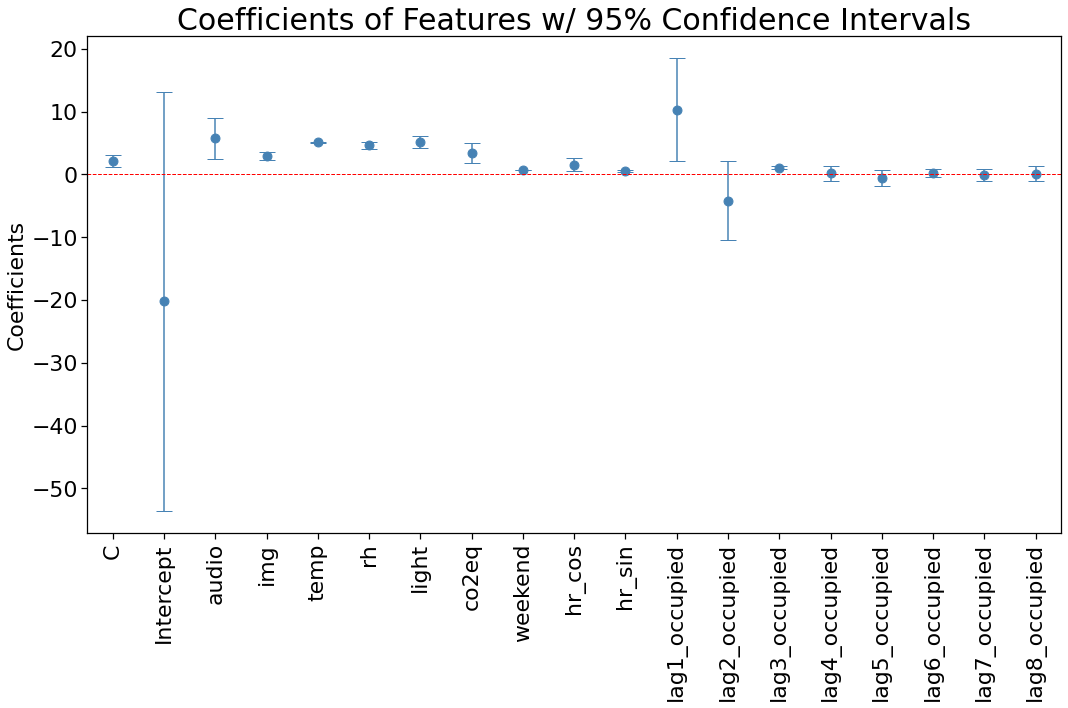

In [225]:
result_file_cv = 'full_CV_zeroFill'
coef_df_cv = get_coeffs(result_file_cv)
coef_cv = plot_coeffs(coef_df=coef_df_cv, fname='CV')
coef_cv.show()